Responsible AI - Project on algorithmic fairness

In [4]:
import  pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns

In [5]:
# read data from csv file
df = pd.read_csv('data/catalan-juvenile-recidivism-subset.csv')

In [6]:
df.head()

,id,V1_sex,V4_area_origin,V6_province,V8_age,V9_age_at_program_end,V11_criminal_record,V12_n_criminal_record,V13_n_crime_cat,V15_main_crime_cat,...,V28_days_from_crime_to_program,V29_program_duration,V115_RECID2015_recid,V10_date_of_birth_year,V10_date_of_birth_month,V22_main_crime_date_year,V22_main_crime_date_month,V30_program_start_year,V30_program_start_month,V31_program_end_month
0,691,male,Spain,Lleida,15,17,1,1-2,3+,Against People,...,587.0,132,1,1992,11,2008,8,2010,4,8
1,956,female,Spain,Barcelona,14,15,1,1-2,2,Against People,...,107.0,258,1,1995,7,2009,8,2009,12,8
2,2560,male,Maghreb,Barcelona,15,16,1,3-5,3+,Against People,...,135.0,85,1,1994,1,2009,11,2010,3,6
3,2018,male,Maghreb,Girona,14,15,1,5+,2,Against People,...,176.0,271,1,1994,4,2009,1,2009,6,3
4,1650,male,Spain,Tarragona,17,20,1,5+,3+,Against People,...,261.0,533,1,1990,9,2008,9,2009,5,11


In [7]:
# create profile report
import pandas as pd
from pandas_profiling import ProfileReport

#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file(output_file='data_profiling_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

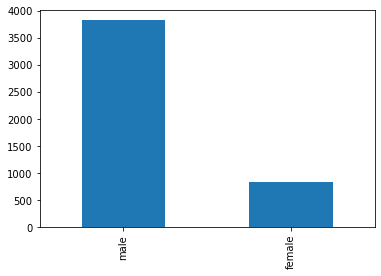

In [8]:
# some highlits from the report

# plot sex distribution
_=df.V1_sex.value_counts().plot(kind='bar')

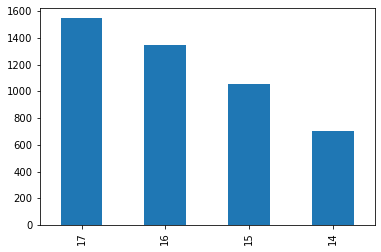

In [9]:
# plot area of origin distribution
_=df.V8_age.value_counts().plot(kind='bar')

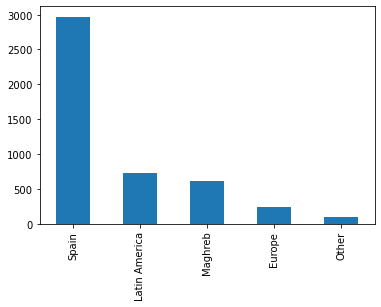

In [10]:
_=df.V4_area_origin.value_counts().plot(kind='bar')

## Training

Split the dataset into training, validation and test sets, and train a machine
learning algorithm of your choice to predict the variable Recidivism

In [11]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [12]:
col_names = df.columns
col_names

Index(['id', 'V1_sex', 'V4_area_origin', 'V6_province', 'V8_age',
       'V9_age_at_program_end', 'V11_criminal_record', 'V12_n_criminal_record',
       'V13_n_crime_cat', 'V15_main_crime_cat', 'V16_violent_crime',
       'V17_crime_classification', 'V19_committed_crime',
       'V20_n_juvenile_records', 'V21_n_crime', 'V23_territory_of_execution',
       'V24_finished_program', 'V26_finished_measure_grouped',
       'V27_program_duration_cat', 'V28_days_from_crime_to_program',
       'V29_program_duration', 'V115_RECID2015_recid',
       'V10_date_of_birth_year', 'V10_date_of_birth_month',
       'V22_main_crime_date_year', 'V22_main_crime_date_month',
       'V30_program_start_year', 'V30_program_start_month',
       'V31_program_end_month'],
      dtype='object')

In [13]:
# feature selection
feature_cols = ['id', 'V1_sex', 'V4_area_origin', 'V6_province', 'V8_age',
       'V9_age_at_program_end', 'V11_criminal_record', 'V12_n_criminal_record',
       'V13_n_crime_cat', 'V15_main_crime_cat', 'V16_violent_crime',
       'V17_crime_classification', 'V19_committed_crime',
       'V20_n_juvenile_records', 'V21_n_crime', 'V23_territory_of_execution',
       'V24_finished_program', 'V26_finished_measure_grouped',
       'V27_program_duration_cat', 'V28_days_from_crime_to_program',
       'V29_program_duration',
       'V10_date_of_birth_year', 'V10_date_of_birth_month',
       'V22_main_crime_date_year', 'V22_main_crime_date_month',
       'V30_program_start_year', 'V30_program_start_month',
       'V31_program_end_month']

In [14]:
X = df[feature_cols] # Features
y = df.V115_RECID2015_recid # Target variable

In [61]:
# find all columns with non-numeric values
non_numeric_cols = []
for col in X.columns:
    if X[col].dtype == 'object':
        non_numeric_cols.append(col)
non_numeric_cols.append('V8_age')

In [62]:
# apply one hot encoding to categorical features
X = pd.get_dummies(X, columns=non_numeric_cols)

In [63]:
# Split dataset into training set and test set  # 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    #stratify=y
                                                    )

In [64]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6318051575931232


# Fairness diagnostics

Please design your own criteria for diagnosing the three main definitions
of fairness: Independence, Separation and Sufficiency. Use your criteria to
perform a diagnostic test of your algorithm with respect to sensitive groups
such as race and/or gender. Please describe your designed diagnostic
criteria, as well as the results of your test. The rest of the project will be
most interesting if you have picked a classifier where you observe unfairness
at this point.

### Attributes to test
Sex: \
'V1_sex_female' \
'V1_sex_male' 

Origin: \
'V4_area_origin_Europe' \
V4_area_origin_Latin America'\
'V4_area_origin_Maghreb'\
'V4_area_origin_Other'

Age:\
'V8_age_14' \
'V8_age_15' \
'V8_age_16' \
'V8_age_17' 



## Independence

In [66]:
# test independence of the model
def test_independence(model,X, a, b, eps=0.01):
    # y is the target variable
    # X is the feature matrix
    # a is the column for the first group
    # b is the column for the second group
    # for both grouqps a and b, the values are 0 or 1 (one-hot encoding)

    # create two groups
    X_a = X[X[a]==1]
    X_b = X[X[b]==1]

    # check prediction for group a and b
    y_pred_a = model.predict(X_a)
    y_pred_b = model.predict(X_b)

    # calculate p(y_pred=1|A=a) and p(y_pred=1|A=b)
    p_a = np.mean(y_pred_a)
    p_b = np.mean(y_pred_b)

    #print results
    print("p(y_pred=1|A={}) = ".format(a), p_a)
    print("p(y_pred=1|A={}) = ".format(b), p_b)

    if np.abs(p_a - p_b) <= eps:
        print("The model fulfills independence")
    else:
        print("The model does not fulfill independence")

    return p_a, p_b


In [67]:
test_independence(clf,X, "V1_sex_male", "V1_sex_female")

p(y_pred=1|A=V1_sex_male) =  0.37676609105180536
p(y_pred=1|A=V1_sex_female) =  0.21686746987951808
The model does not fulfill independence


comment: the model discriminates males

In [72]:
test_independence(clf,X, 'V8_age_14', 'V8_age_15')
test_independence(clf,X, 'V8_age_16', 'V8_age_17')

p(y_pred=1|A=V8_age_14) =  0.4581560283687943
p(y_pred=1|A=V8_age_15) =  0.38461538461538464
The model does not fulfill independence
p(y_pred=1|A=V8_age_16) =  0.36654275092936806
p(y_pred=1|A=V8_age_17) =  0.2575855390574564
The model does not fulfill independence


comment: younger people are more likely predicted to recidivate

In [74]:
test_independence(clf,X, 'V4_area_origin_Europe', 'V4_area_origin_Latin America')
test_independence(clf,X, 'V4_area_origin_Maghreb', 'V4_area_origin_Other')

p(y_pred=1|A=V4_area_origin_Europe) =  0.3524590163934426
p(y_pred=1|A=V4_area_origin_Latin America) =  0.39339752407152684
The model does not fulfill independence
p(y_pred=1|A=V4_area_origin_Maghreb) =  0.5114754098360655
p(y_pred=1|A=V4_area_origin_Other) =  0.29292929292929293
The model does not fulfill independence


comment: the model discriminates certain races: arabic poeple are more likely to 

In [75]:
# test seperation of the model
def test_seperation(model,X, y, a, b, eps=0.01):
    # y is the target variable
    # X is the feature matrix
    # a is the column for the first group
    # b is the column for the second group
    # for both grouqps a and b, the values are 0 or 1 (one-hot encoding)

    # create four groups
    X_1_a = X[(X[a]==1) & (y==1)]
    X_1_b = X[(X[b]==1) & (y==1)]
    X_0_a = X[(X[a]==1) & (y==0)]
    X_0_b = X[(X[b]==1) & (y==0)]

    # check prediction all groups
    y_pred_1_a = model.predict(X_1_a)
    y_pred_1_b = model.predict(X_1_b)
    y_pred_0_a = model.predict(X_0_a)
    y_pred_0_b = model.predict(X_0_b)

    # calculate p(y_pred=1|Y=1, A=a) and p(y_pred=1|Y=1, A=b) etc
    p_1_a = np.mean(y_pred_1_a)
    p_1_b = np.mean(y_pred_1_b)
    p_0_a = np.mean(y_pred_0_a)
    p_0_b = np.mean(y_pred_0_b)

    #print results
    print("p(y_pred=1|Y=1, A={}) = ".format(a), p_1_a)
    print("p(y_pred=1|Y=1, A={}) = ".format(b), p_1_b)
    print("p(y_pred=1|Y=0, A={}) = ".format(a), p_0_a)
    print("p(y_pred=1|Y=0, A={}) = ".format(b), p_0_b)

    if (np.abs(p_1_a - p_1_b) <= eps) & (np.abs(p_0_a - p_0_b) <= eps):
        print("The model fulfills seperation")
    else:
        print("The model does not fulfill seperation")

    return p_1_a, p_1_b, p_0_a, p_0_b

In [79]:
_=test_seperation(clf,X,y, "V1_sex_male", "V1_sex_female")

p(y_pred=1|Y=1, A=V1_sex_male) =  0.8532303370786517
p(y_pred=1|Y=1, A=V1_sex_female) =  0.7941176470588235
p(y_pred=1|Y=0, A=V1_sex_male) =  0.09382819015846539
p(y_pred=1|Y=0, A=V1_sex_female) =  0.06818181818181818
The model does not fulfill seperation


In [80]:
_=test_seperation(clf,X,y, 'V8_age_14', 'V8_age_15')
_=test_seperation(clf,X,y, 'V8_age_16', 'V8_age_17')

p(y_pred=1|Y=1, A=V8_age_14) =  0.873015873015873
p(y_pred=1|Y=1, A=V8_age_15) =  0.8159806295399515
p(y_pred=1|Y=0, A=V8_age_14) =  0.12307692307692308
p(y_pred=1|Y=0, A=V8_age_15) =  0.10625
The model does not fulfill seperation
p(y_pred=1|Y=1, A=V8_age_16) =  0.8679245283018868
p(y_pred=1|Y=1, A=V8_age_17) =  0.8329048843187661
p(y_pred=1|Y=0, A=V8_age_16) =  0.09101382488479262
p(y_pred=1|Y=0, A=V8_age_17) =  0.06465517241379311
The model does not fulfill seperation


In [81]:
_=test_seperation(clf,X,y, 'V4_area_origin_Europe', 'V4_area_origin_Latin America')
_=test_seperation(clf,X,y, 'V4_area_origin_Maghreb', 'V4_area_origin_Other')

p(y_pred=1|Y=1, A=V4_area_origin_Europe) =  0.8674698795180723
p(y_pred=1|Y=1, A=V4_area_origin_Latin America) =  0.8566308243727598
p(y_pred=1|Y=0, A=V4_area_origin_Europe) =  0.08695652173913043
p(y_pred=1|Y=0, A=V4_area_origin_Latin America) =  0.10491071428571429
The model does not fulfill seperation
p(y_pred=1|Y=1, A=V4_area_origin_Maghreb) =  0.8666666666666667
p(y_pred=1|Y=1, A=V4_area_origin_Other) =  0.9583333333333334
p(y_pred=1|Y=0, A=V4_area_origin_Maghreb) =  0.13220338983050847
p(y_pred=1|Y=0, A=V4_area_origin_Other) =  0.08
The model does not fulfill seperation
